Import Libraries

In [11]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

Explore the data

In [12]:
path_to_data = "/Users/alicja/Desktop/PROJECT/Healthcare-Diabetes.csv"
df = pd.read_csv(path_to_data)

In [13]:
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [14]:
df.shape

(2768, 10)

In [15]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


The minimum value in the columns should be greater than 0. I'm checking how many cells in a given column have a zero value.

Assumptions:
  "Id" - not needed for this evaluation,
  "Pregnancies" - 0 value is valid data,
  "Outcome" - 0 value is valid data (indicates no diabetes).

In [20]:
data = df.drop(columns=["Id", "Pregnancies", "Outcome"])

num_of_zero_values_per_column = (data == 0).sum()
percentage = round(num_of_zero_values_per_column / len(df.index) * 100, 2)

result = pd.concat([num_of_zero_values_per_column, percentage], axis=1, keys=["Number of rows","Percentage of all rows"])
result.sort_values(by="Percentage of all rows")

,Number of rows,Percentage of all rows
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Glucose,18,0.65
BMI,39,1.41
BloodPressure,125,4.52
SkinThickness,800,28.90
Insulin,1330,48.05


Missing data (value 0) in the 'Glucose,' 'BMI,' and 'BloodPressure' columns make up a small percentage of the data. Therefore, depending on the data distribution, the value of zero will be changed to the mean (in the case of a normal distribution) or the median.

The same strategy has been applied to the 'SkinThickness' column. Despite the missing data percentage being 28.9%, losing such a large amount of data with a relatively small dataset would be unfavorable for further analysis.

The 'Insulin' column will be removed due to the fact that the missing data percentage is almost 50%.


Glucose	18	0.65
BMI	39	1.41
BloodPressure	125	4.52
SkinThickness	800	28.90
Insulin	1330	48.05

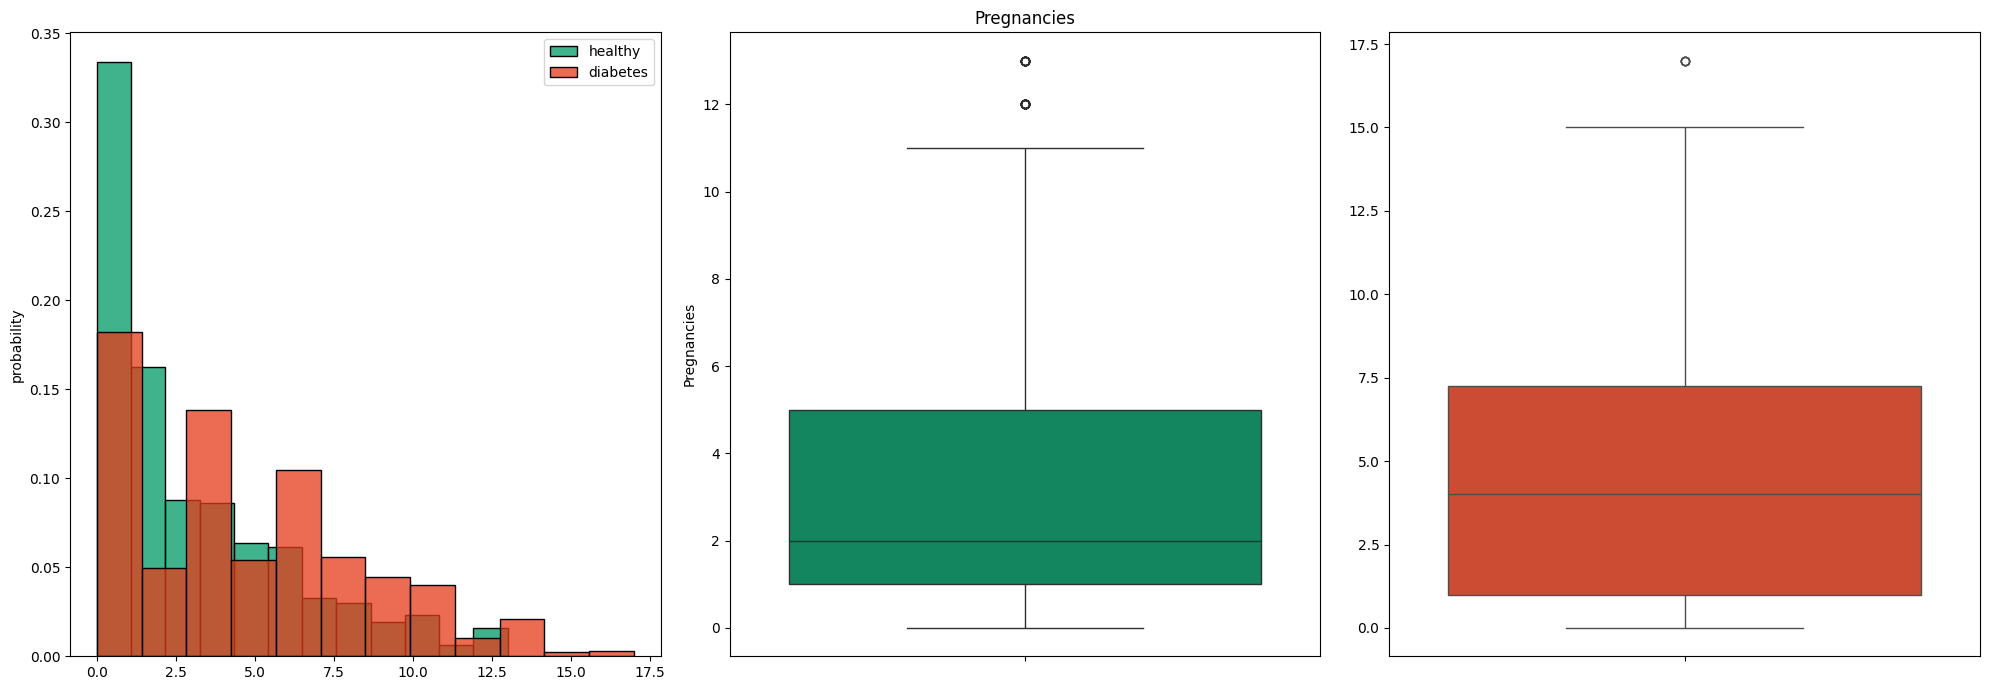

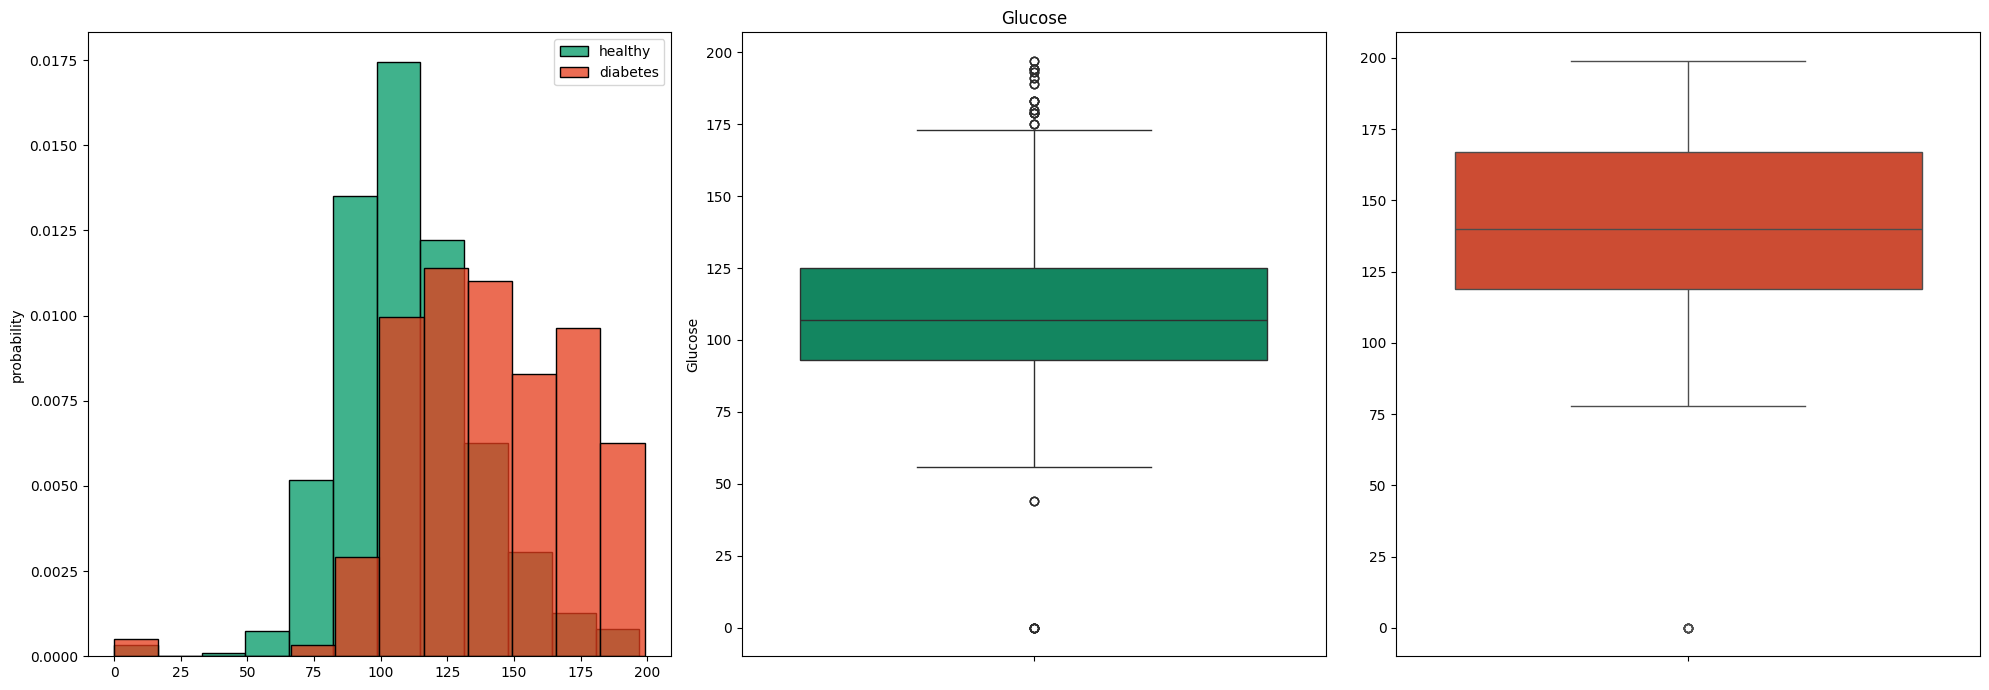

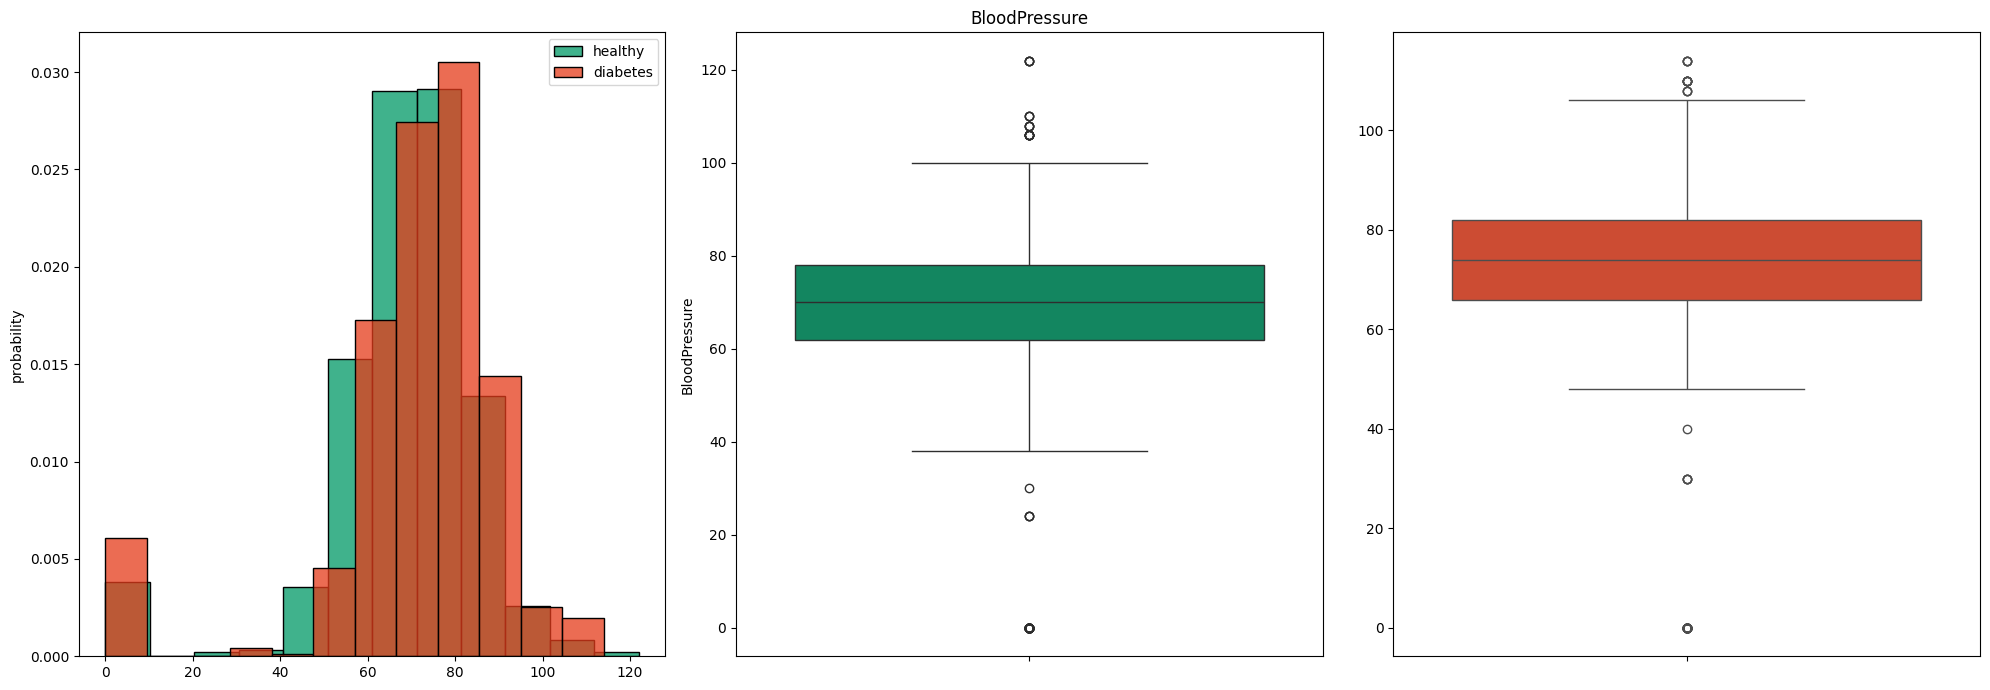

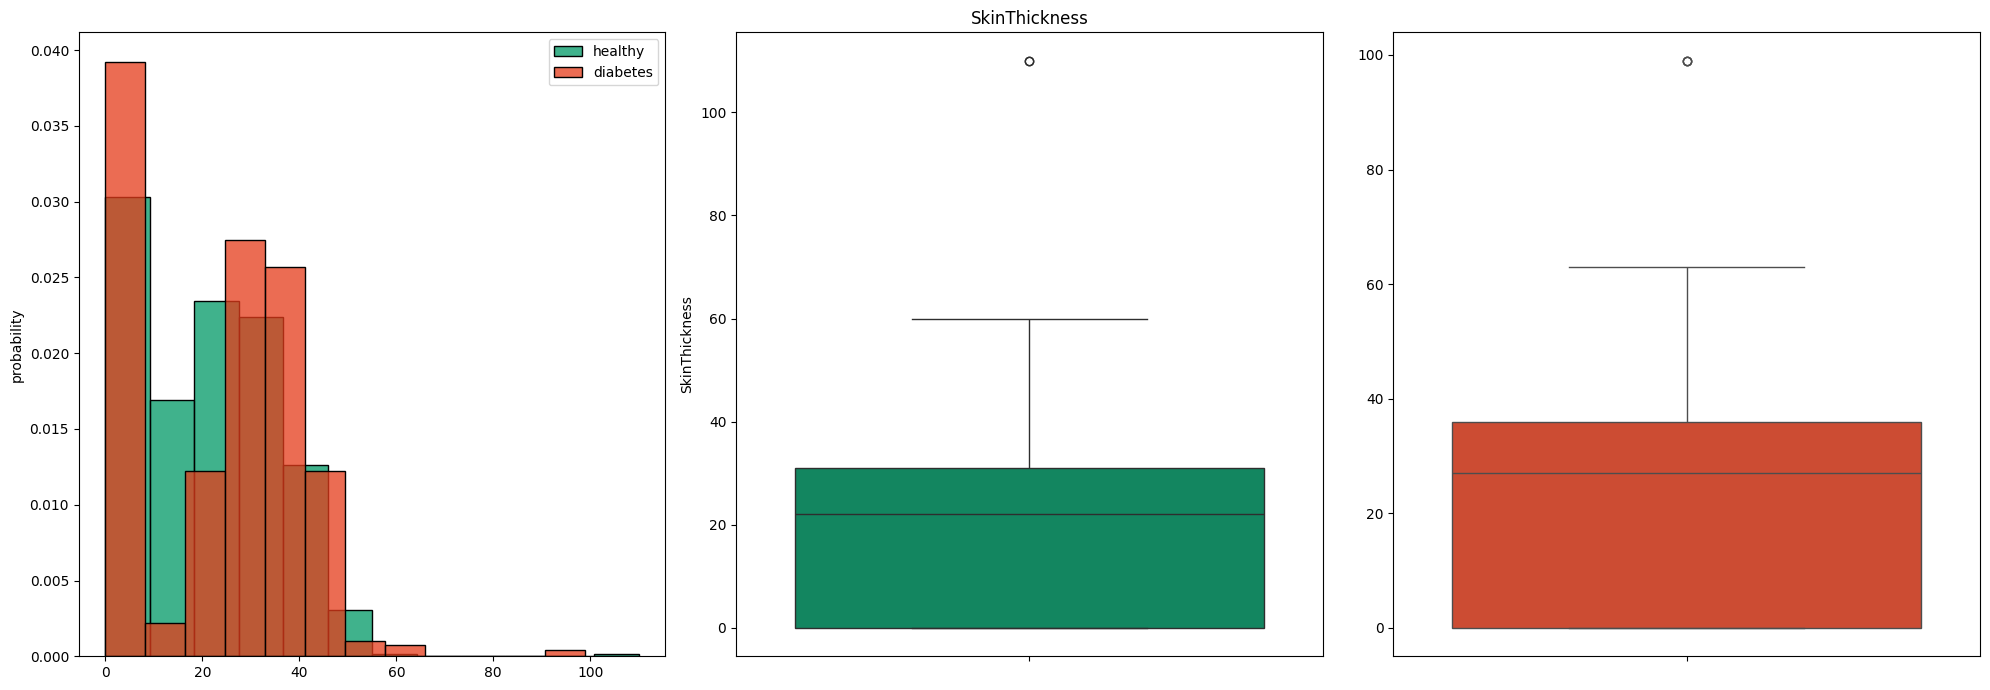

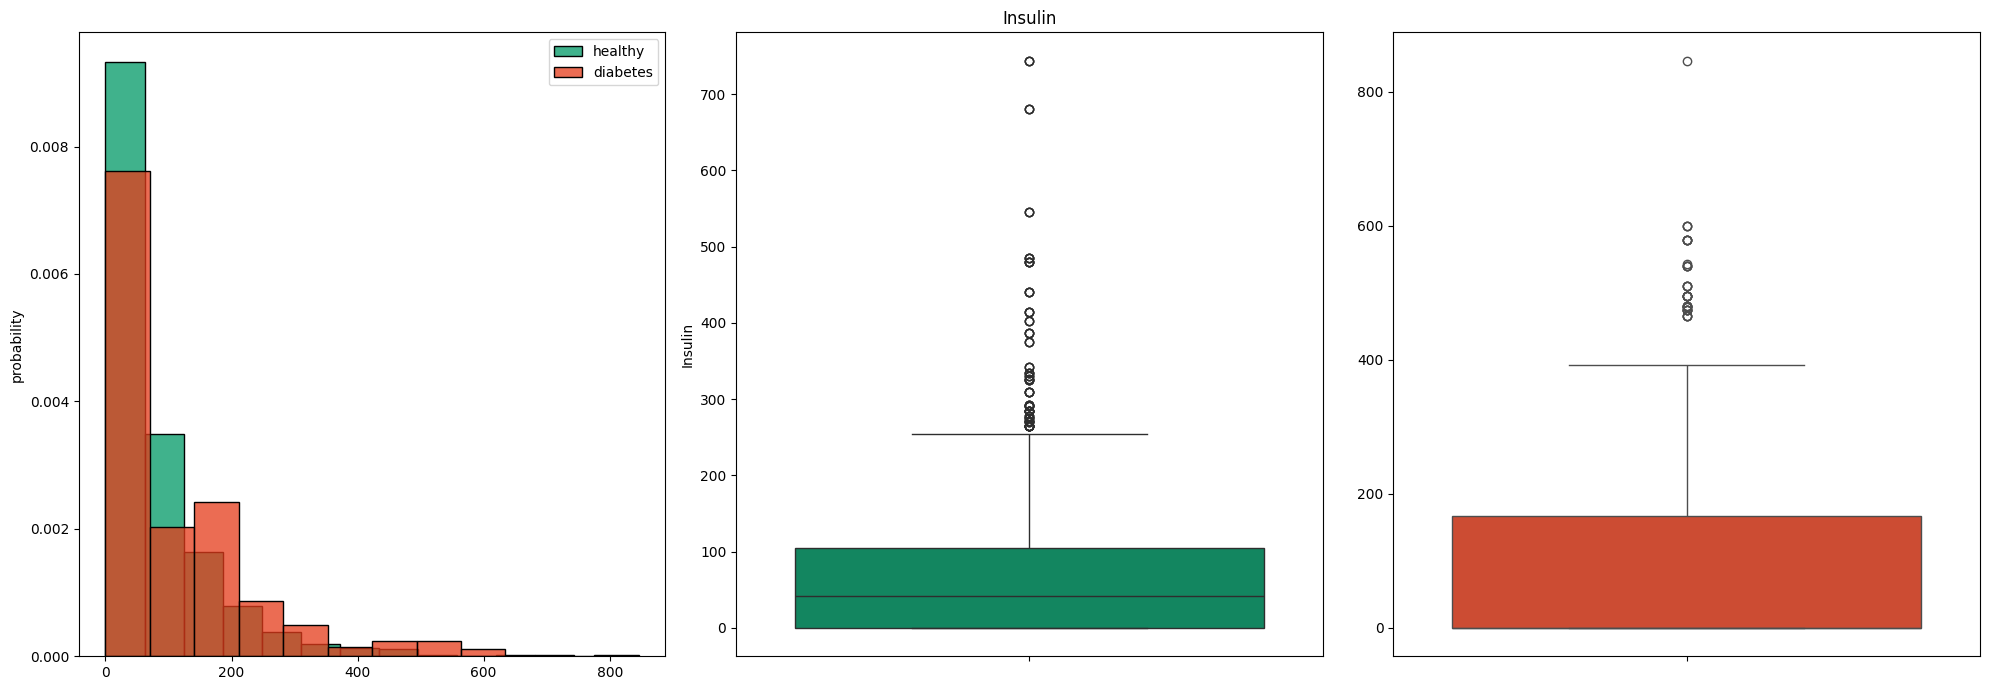

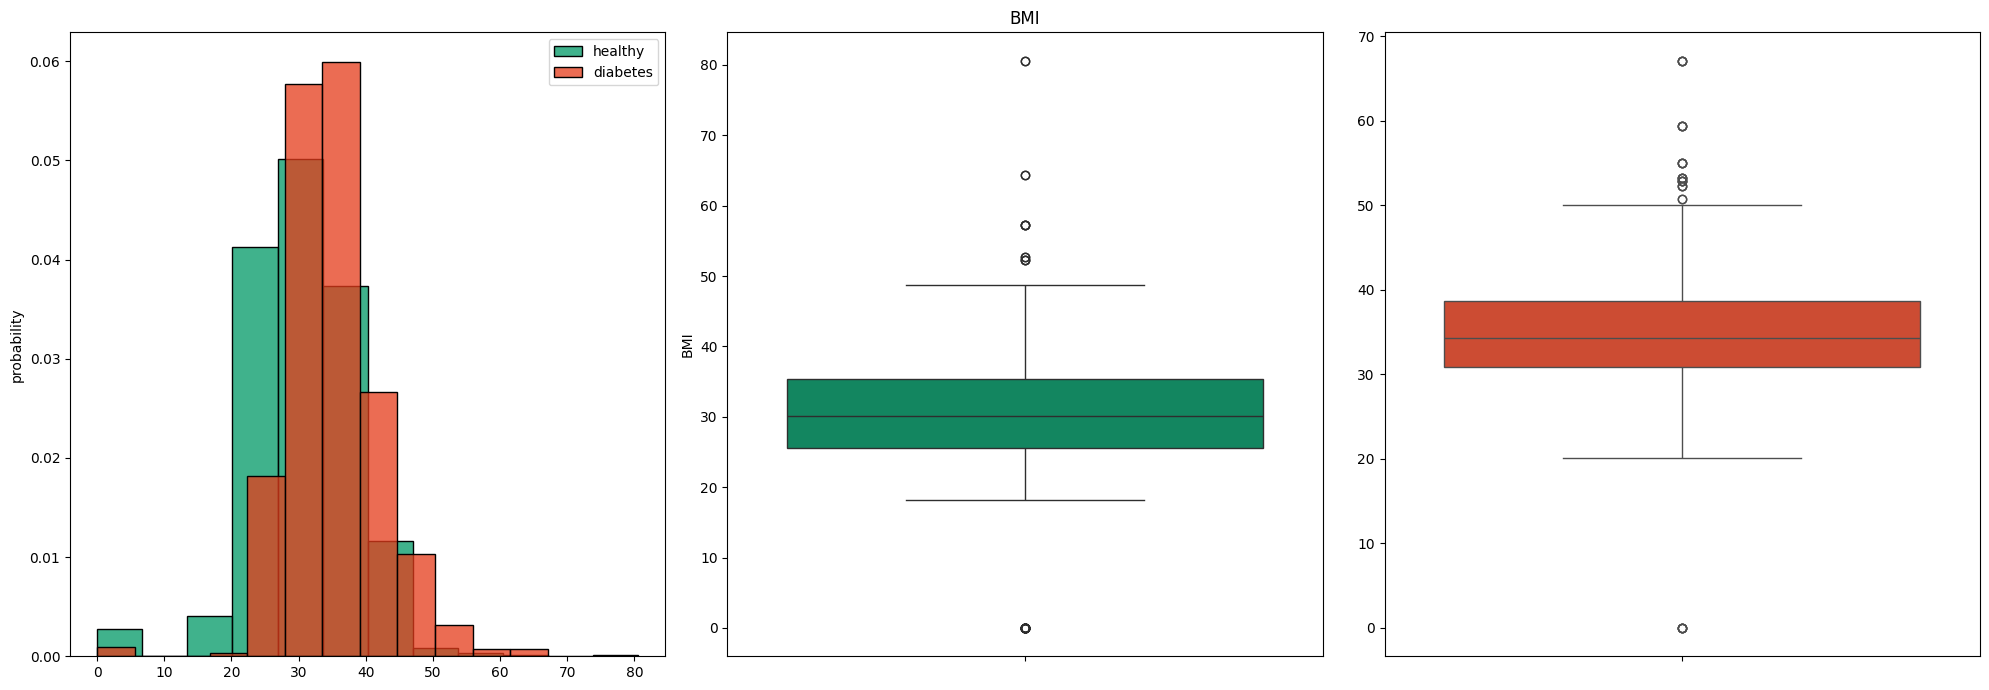

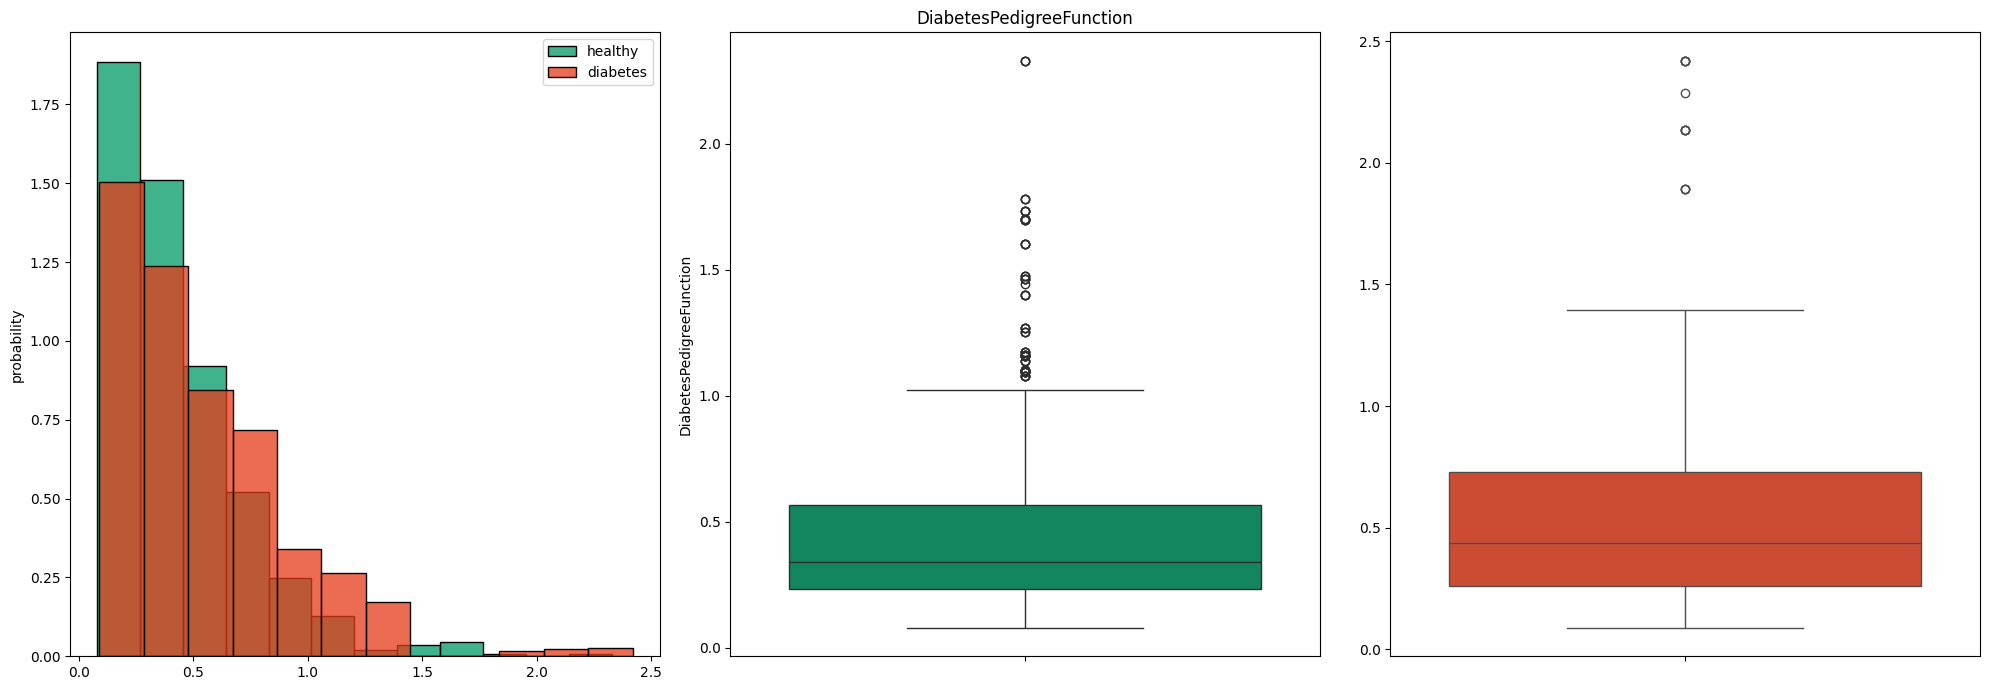

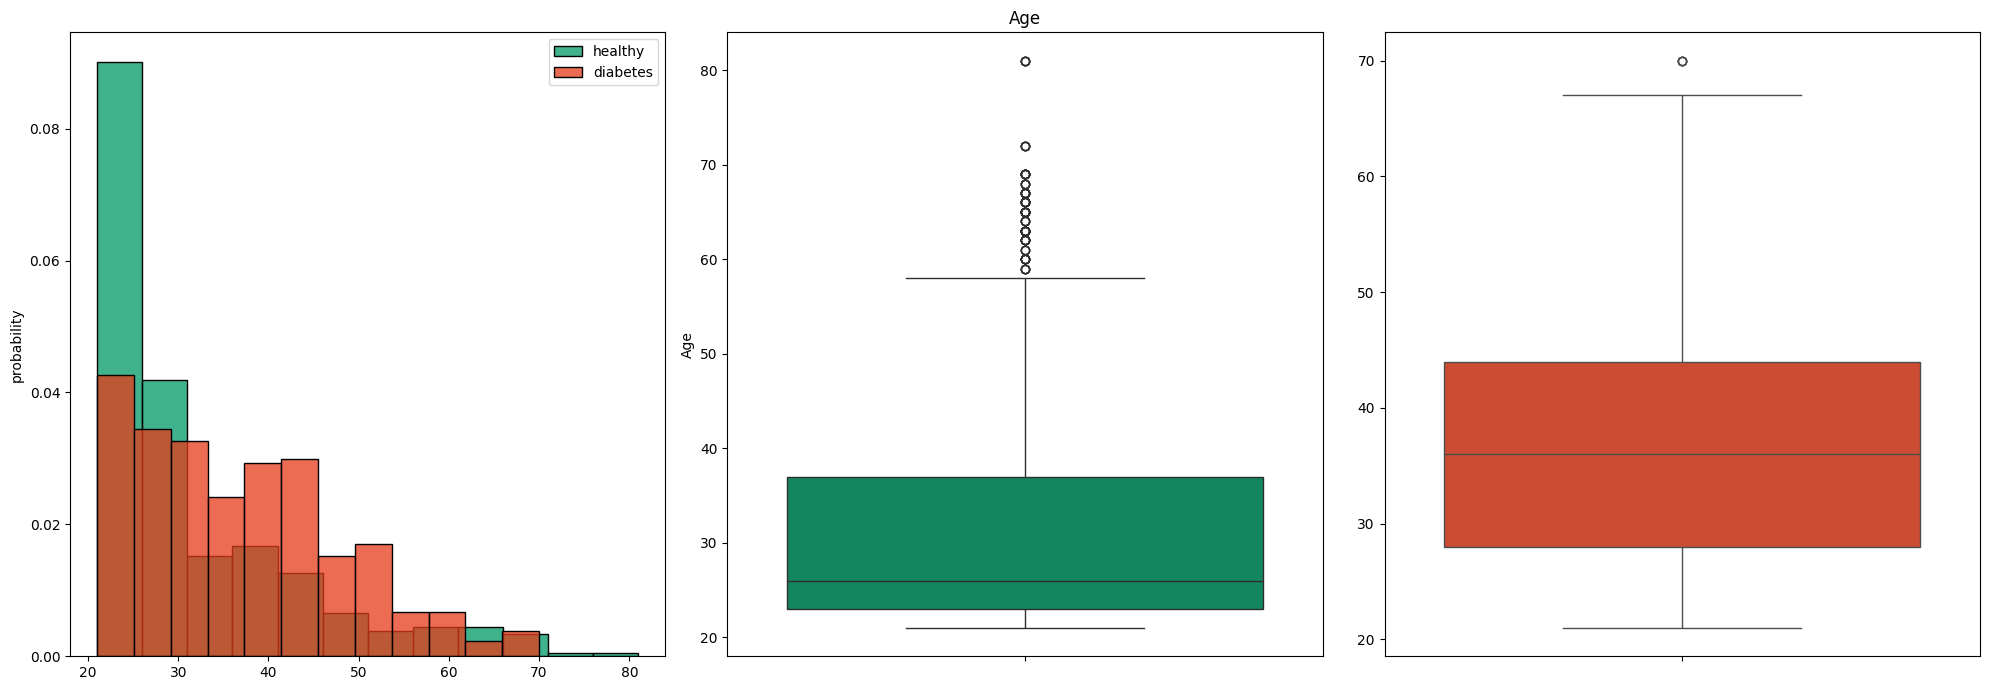

In [21]:
for column in df.drop(columns=["Id", "Outcome"]):
    fig, axs = plt.subplots(1, 3, figsize=(20, 7))
    axs = axs.flatten()

    bins = 25
    if column == "Pregnancies" or "Age":
        bins = 12
   
    sns.histplot(df[df["Outcome"] == 0][column], bins=bins, color="#009966",  label="healthy", stat="density", ax=axs[0])
    sns.histplot(df[df["Outcome"] == 1][column], bins=bins, color="#E53B1A", label="diabetes", stat="density", ax=axs[0])
    
    sns.boxplot(df[df["Outcome"] == 0][column], color="#009966", ax=axs[1])
    sns.boxplot(df[df["Outcome"] == 1][column], color="#E53B1A", ax=axs[2])
    
    axs[1].set_title(column)
    axs[0].set_xlabel("")
    axs[0].set_ylabel("probability")
    #axs[1].set_ylabel("")
    axs[2].set_ylabel("")
    axs[0].legend()
    plt.tight_layout()
    plt.show()

In [22]:
def replace_missing_data_median(column_name):
    for i in range(2):
        median = df[df["Outcome"] == i][column_name][df[column_name] > 0].median()
        cell_to_replace = df[df["Outcome"] == i]["Id"][df[column_name] == 0]

        for id_num in cell_to_replace:
            df.loc[id_num-1, column_name] = median

In [23]:
def replace_missing_data_mean(column_name):
    for i in range(2):
        mean = df[df["Outcome"] == i][column_name][df[column_name] > 0].mean()
        cell_to_replace = df[df["Outcome"] == i]["Id"][df[column_name] == 0]

        for id_num in cell_to_replace:
            df.loc[id_num-1, column_name] = mean

In [24]:
for column in ["Glucose", "BMI", "SkinThickness"]:
    replace_missing_data_median(column)

replace_missing_data_mean("BloodPressure")

df = df.drop(columns="Insulin")

/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_22395/3479991247.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '70.85051546391753' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[id_num-1, column_name] = mean


/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/fv/xq0ksdjj6qs_gmxn6yvd1j7c0000gn/T/ipykernel_22395/819827207.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


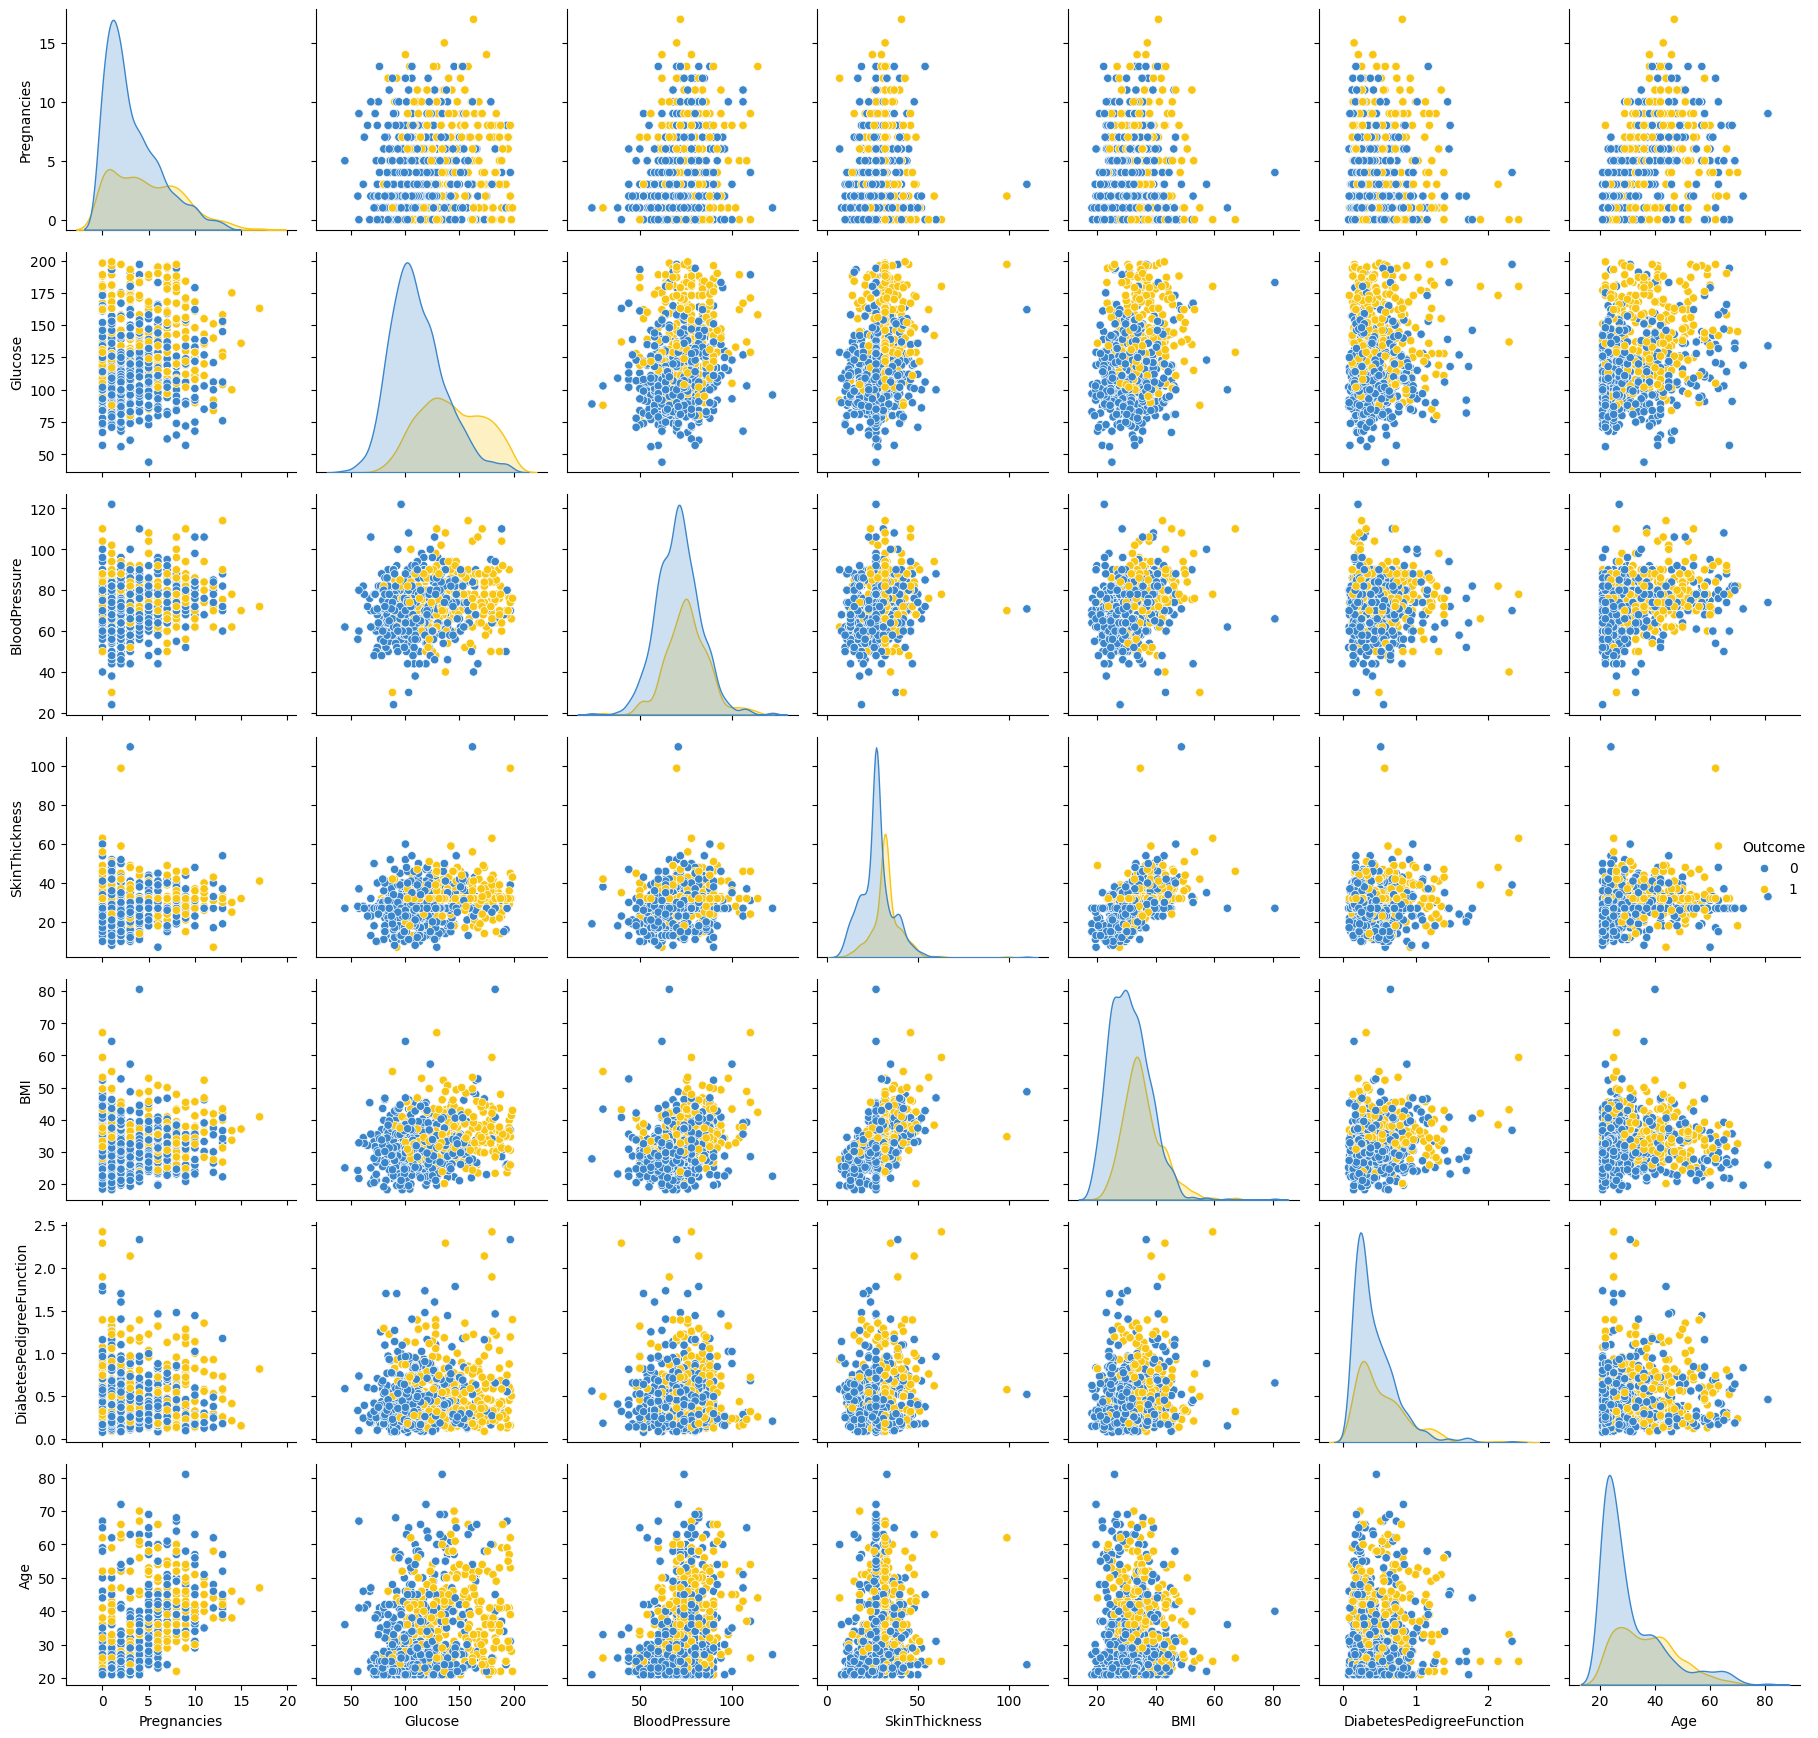

In [25]:
sns.pairplot(data=df, vars=df.columns[1:8], hue="Outcome", palette=["#3B86CB", "#F8C512"])
plt.tight_layout()

<Axes: >

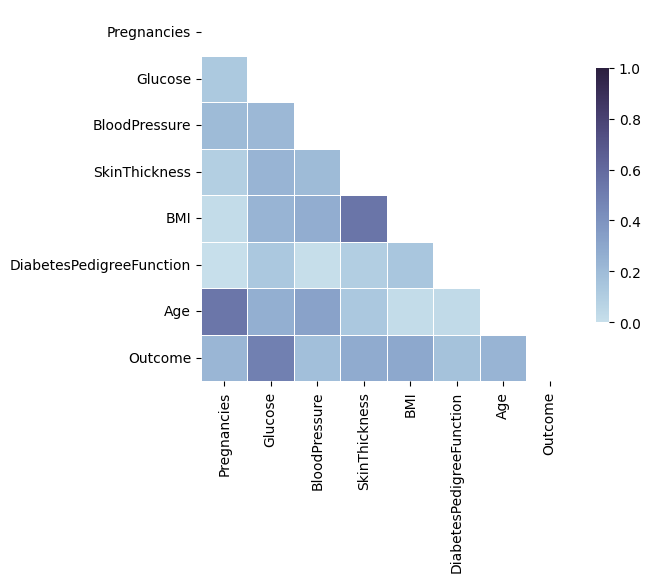

In [26]:
correlation_matrix = df[df.columns[1:]].corr()

fig, ax = plt.subplots(figsize=(6, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.heatmap(correlation_matrix, vmin=0, vmax=1, linewidth=0.5, cmap=cmap, square=True, 
            mask=mask, cbar_kws={"shrink": 0.55} )

In [27]:
correlation_matrix.drop("Outcome")

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125502,0.201621,0.090724,0.016170,-0.027731,0.540805,0.223796
Glucose,0.125502,1.000000,0.211099,0.236706,0.237511,0.128991,0.263983,0.492622
BloodPressure,0.201621,0.211099,1.000000,0.205268,0.269402,0.008267,0.323721,0.181260
SkinThickness,0.090724,0.236706,0.205268,1.000000,0.546014,0.101065,0.131045,0.283604
BMI,0.016170,0.237511,0.269402,0.546014,1.000000,0.144425,0.022044,0.293301
DiabetesPedigreeFunction,-0.027731,0.128991,0.008267,0.101065,0.144425,1.000000,0.028544,0.160664
Age,0.540805,0.263983,0.323721,0.131045,0.022044,0.028544,1.000000,0.237050


In [28]:
correlation_between_features = (correlation_matrix.where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))
                                .stack()
                                .sort_values(ascending=False))

print(f"The top 10 highest correlation coefficients between individual features: \n\n{correlation_between_features.nlargest(10)}")

The top 10 highest correlation coefficients between individual features: 

SkinThickness  BMI        0.546014
Pregnancies    Age        0.540805
Glucose        Outcome    0.492622
BloodPressure  Age        0.323721
BMI            Outcome    0.293301
SkinThickness  Outcome    0.283604
BloodPressure  BMI        0.269402
Glucose        Age        0.263983
               BMI        0.237511
Age            Outcome    0.237050
dtype: float64


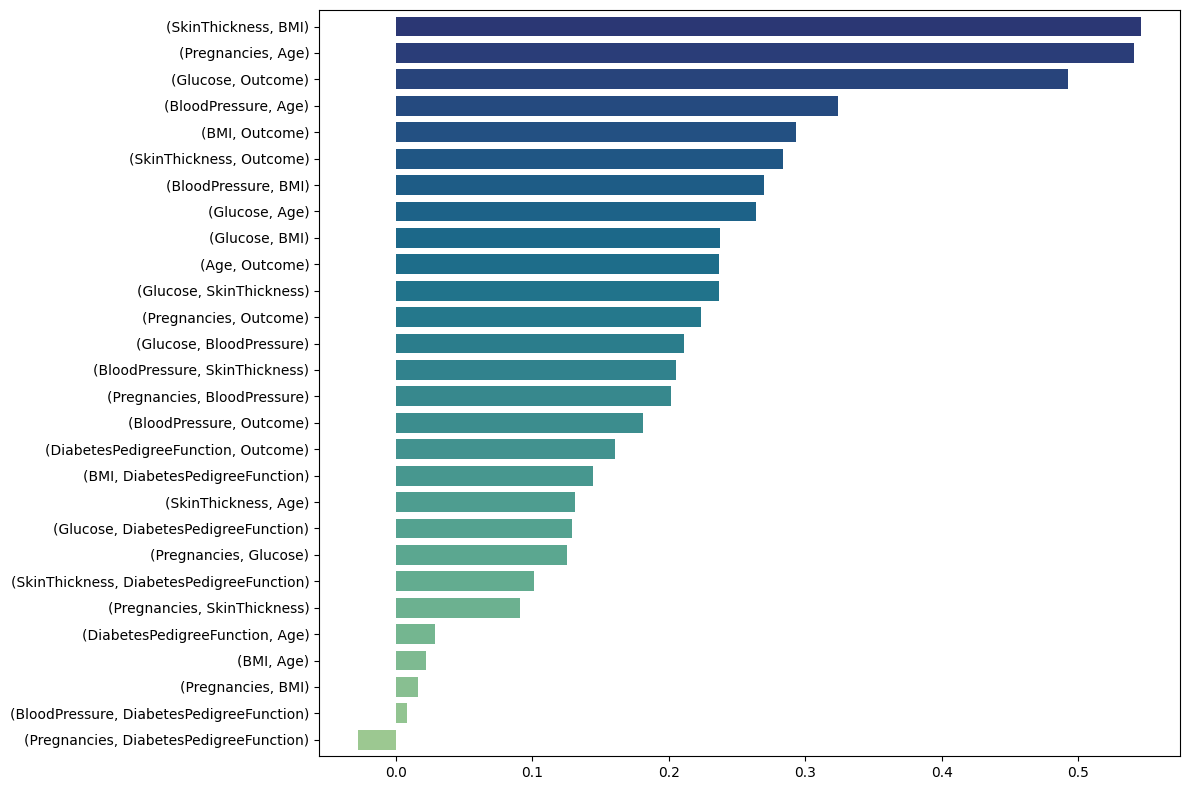

In [29]:
plt.figure(figsize=(12, 8))
color = sns.color_palette("crest", 28)
color.reverse()
correlation_between_features.plot.barh(color=color, width=0.75).invert_yaxis()
plt.tight_layout()

In [30]:
corr_with_outcome = correlation_matrix.drop("Outcome")["Outcome"].sort_values(ascending=False)
print(f"Correlation coefficient of individual features with the target: \n\n{corr_with_outcome}")

Correlation coefficient of individual features with the target: 

Glucose                     0.492622
BMI                         0.293301
SkinThickness               0.283604
Age                         0.237050
Pregnancies                 0.223796
BloodPressure               0.181260
DiabetesPedigreeFunction    0.160664
Name: Outcome, dtype: float64


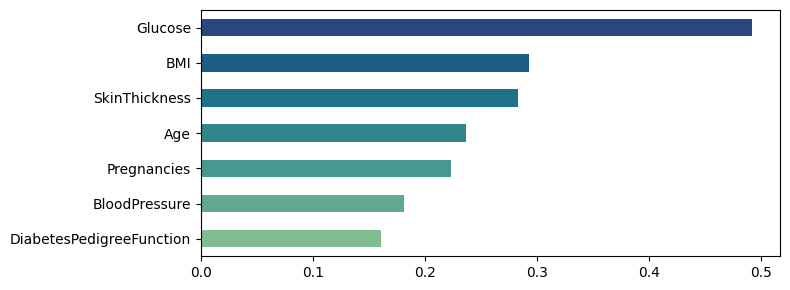

In [31]:
plt.figure(figsize=(8, 3))
color = sns.color_palette('crest', 7)
color.reverse()
corr_with_outcome.plot.barh(color=color).invert_yaxis()
plt.tight_layout()

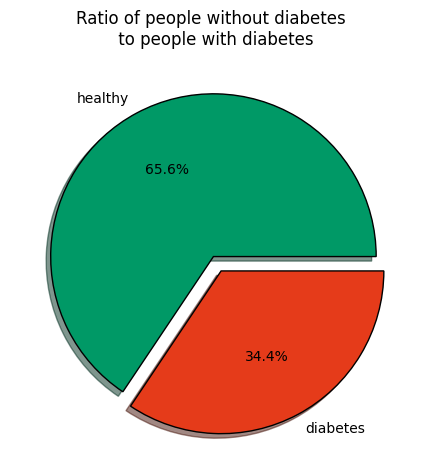

In [32]:
outcome_count = df['Outcome'].value_counts()

outcome_count.plot(kind="pie",
                    title="Ratio of people without diabetes \n to people with diabetes",
                    labels=["healthy", "diabetes"], 
                    ylabel="",
                    colors=["#009966", "#E53B1A"], 
                    explode=[0, 0.1], 
                    shadow=True, 
                    autopct='%1.1f%%', 
                    radius=1, 
                    wedgeprops={"edgecolor": "black"})

plt.tight_layout()
plt.show()

Machine Learning - binary classification

Preparing data:
1) split dataset to train, validation and test set
2) scale dataset
3) oversample

In [33]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [34]:
df = df.drop(columns="Id")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,33.6,0.627,50,1
1,1,85,66.0,29,26.6,0.351,31,0
2,8,183,64.0,32,23.3,0.672,32,1
3,1,89,66.0,23,28.1,0.167,21,0
4,0,137,40.0,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
2763,2,75,64.0,24,29.7,0.370,33,0
2764,8,179,72.0,42,32.7,0.719,36,1
2765,6,85,78.0,27,31.2,0.382,42,0
2766,0,129,110.0,46,67.1,0.319,26,1


Machine Learning - binary classification

Preparing data:
1) split dataset to train, validation and test set
2) scale dataset
3) oversample

In [36]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [37]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [38]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn_model.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       356
           1       0.73      0.89      0.80       198

    accuracy                           0.84       554
   macro avg       0.83      0.85      0.84       554
weighted avg       0.86      0.84      0.85       554



Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = nb_model.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       356
           1       0.65      0.71      0.68       198

    accuracy                           0.76       554
   macro avg       0.74      0.75      0.74       554
weighted avg       0.77      0.76      0.76       554



Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
# mona uyć inna wartość penalty
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = lr_model.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       356
           1       0.67      0.76      0.71       198

    accuracy                           0.78       554
   macro avg       0.76      0.77      0.77       554
weighted avg       0.79      0.78      0.78       554



SVM

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [53]:
y_pred = svm_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       356
           1       0.74      0.86      0.79       198

    accuracy                           0.84       554
   macro avg       0.82      0.84      0.83       554
weighted avg       0.85      0.84      0.84       554



Neural Network

In [55]:
import tensorflow as tf

In [62]:
# sigmoid - powoduje zaokrąglenie wyniku do 0 lub jeden, co pozwala nam na klasyfikację (chory vs zdrowy)
def plot_loss(hisory):
    plt.plot(history.history['loss'], label="loss")
    plt.plot(history.history['val_loss'], label="val_loss")
    plt.xlabel('epoch')
    plt.ylabel('binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [64]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(7,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

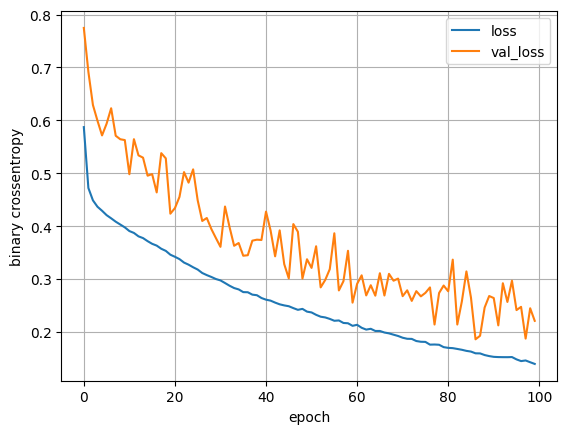

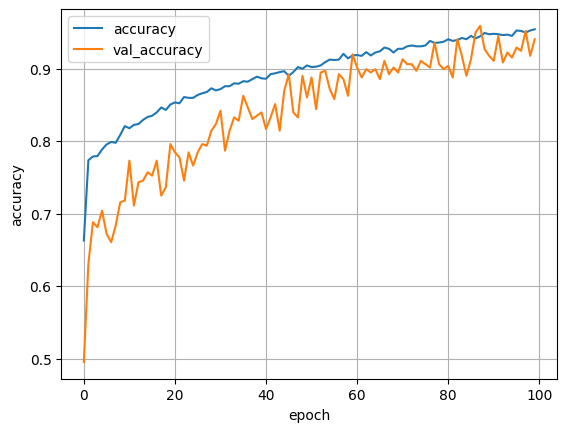

In [63]:
# 32 
plot_loss(history)
plot_accuracy(history)

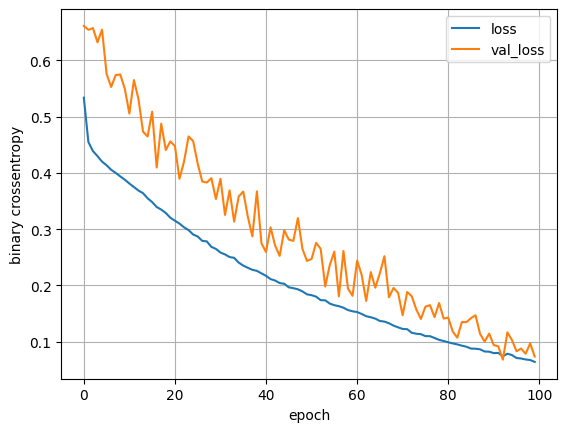

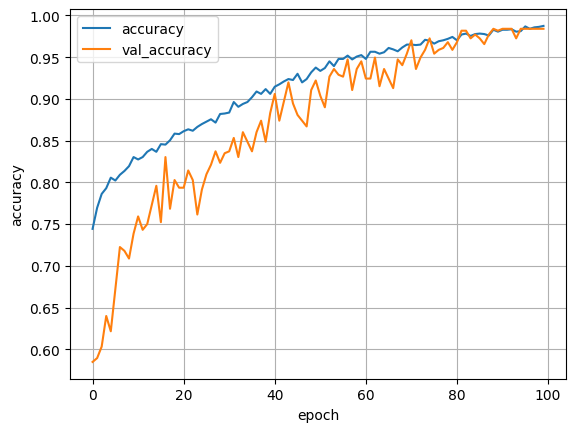

In [66]:
# 64 
plot_loss(history)
plot_accuracy(history)